In [4]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
dia = pd.read_csv(r'C:\Users\DELL\Documents\DS_LAB_Internal -  Question and Datasets - 2023-May\Diabetes.csv')

In [46]:
dia.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [47]:
dia.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [48]:
dia.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times pregnant,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plasma glucose concentration,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Diastolic blood pressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
Triceps skin fold thickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
2-Hour serum insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
Body mass index,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
Diabetes pedigree function,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age (years),768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [49]:
dia.isnull().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
 Class variable                  0
dtype: int64

In [50]:
dia[' Class variable']

0      YES
1       NO
2      YES
3       NO
4      YES
      ... 
763     NO
764     NO
765     NO
766    YES
767     NO
Name:  Class variable, Length: 768, dtype: object

In [51]:
dia[' Class variable']=dia[' Class variable'].map({'YES':1,'NO':0})

In [52]:
y=dia[' Class variable']

In [56]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name:  Class variable, dtype: int64

In [54]:
x=dia.drop(' Class variable',axis='columns')

In [55]:
x

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [58]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((537, 8), (231, 8), (537,), (231,))

In [59]:
from sklearn.linear_model import LinearRegression

mregression = LinearRegression()
mregression.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = mregression.predict(x_test)

In [61]:
y_pred

array([ 4.47994422e-01,  3.62687782e-01,  2.00287117e-01,  5.09413714e-04,
        2.64959413e-01,  3.23848651e-01,  3.90957908e-01,  1.40541238e-01,
        2.08269942e-01,  2.56534000e-01,  4.45576411e-01,  7.69510647e-02,
        1.16034853e+00,  6.54600355e-01, -7.23827007e-02,  6.52456041e-01,
        2.93134985e-01,  3.55697965e-01,  1.82898595e-01,  2.06314687e-01,
        4.24370420e-01,  1.86354909e-01,  9.92696939e-01,  3.17081523e-01,
        6.41372758e-02,  4.22836610e-01,  2.50325066e-01,  6.66946047e-01,
        8.92764895e-02,  4.77973093e-01,  4.20800948e-01,  3.74947235e-01,
        2.28423208e-02,  6.27269286e-01,  1.80828127e-01,  5.93381203e-01,
        1.07915782e-01,  2.40394522e-01,  1.19792767e-01,  5.54851925e-01,
        2.63118625e-01,  9.99461984e-02, -4.60230319e-02,  3.45557806e-01,
        6.99915235e-02, -1.25983574e-01,  6.89278673e-01,  7.42849542e-01,
        8.32060476e-02,  1.84713667e-01, -2.74342214e-01,  2.41001220e-01,
        7.74626432e-01,  

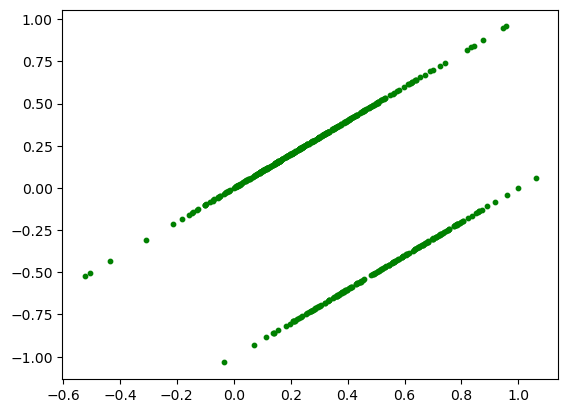

In [67]:
plt.scatter(mregression.predict(x_train), mregression.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')

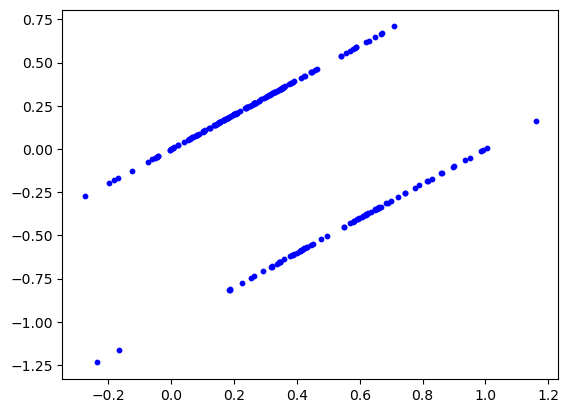

In [69]:

plt.scatter(mregression.predict(x_test), mregression.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')